# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Set the training, validation, and testing data


In [1]:
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(validation_file, mode='rb') as f:
    validation = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

x_train, y_train = train['features'], train['labels']
x_validation, y_validation = validation['features'], validation['labels']
x_test, y_test = test['features'], test['labels']

## Dataset Summary

Show size of each dataset.

Show the sign counts for each type of dataset.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

print("Total training samples =", len(x_train))
print("Total validation samples =", len(x_validation))
print("Total testing samples =", len(x_test))
print("Total classes =", np.unique(y_train).size)
print("Image data shape =", format(x_train[0].shape))

Total training samples = 34799
Total validation samples = 4410
Total testing samples = 12630
Total classes = 43
Image data shape = (32, 32, 3)


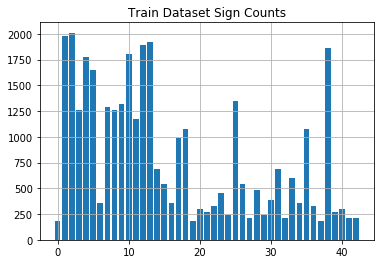

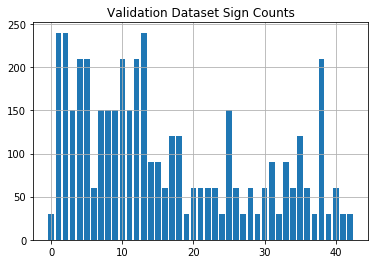

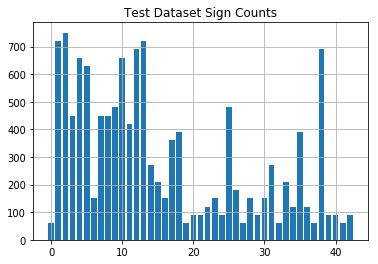

In [3]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_validation, counts_validation = np.unique(y_validation, return_counts=True)
plt.bar(unique_validation, counts_validation)
plt.grid()
plt.title("Validation Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

## Visualize Data

Display a sample dataset in 3 x 5 grid format.


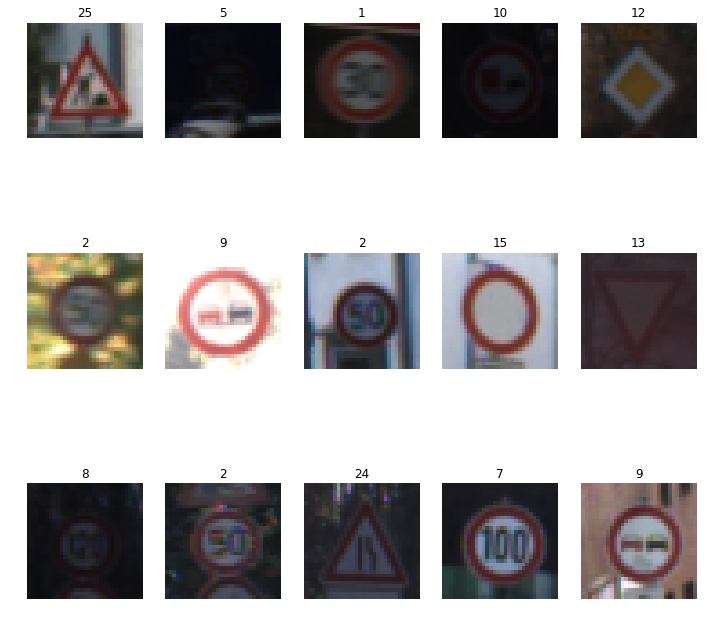

In [4]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

figure, axis = plt.subplots(3,5, figsize=(12, 12))
axis = axis.ravel()
for i in range(0, 15):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    axis[i].axis('off')
    image = image.squeeze()
    axis[i].imshow(image)
    axis[i].set_title(y_train[index])
    

## Preprocess Data

Shuffle the training data, convert to grayscale and normalize.

Verify the shapes have been modified to 1 layer.

In [5]:
#Preprocess Functions
def normalize(data):
    return data / 255 * 0.8 + 0.1

def toGrayscale(x_data):
    x_data_rgb = x_data
    x_data_gry = np.sum(x_data/3, axis=3, keepdims=True)
    return x_data_gry


In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data.
x_train, y_train = shuffle(x_train, y_train)

# Convert image to grayscale
x_train = toGrayscale(x_train)
x_validation = toGrayscale(x_validation)
x_test = toGrayscale(x_test)

# Normalize
x_train = normalize(x_train)
x_validation = normalize(x_validation)
x_test = normalize(x_test)

# Split the data
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size= 0.1, random_state = 3)

# Validate the shape after converting to grayscale
print("Training Shape: {}", format(x_train[0].shape))
print("Validation Shape: {}", format(x_validation[0].shape))
print("Test Shape: {}", format(x_test[0].shape))

Training Shape: {} (32, 32, 1)
Validation Shape: {} (32, 32, 1)
Test Shape: {} (32, 32, 1)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.


In [7]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 64

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
      
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.721
EPOCH 2 ...
Validation Accuracy = 0.848
EPOCH 3 ...
Validation Accuracy = 0.875
EPOCH 4 ...
Validation Accuracy = 0.912
EPOCH 5 ...
Validation Accuracy = 0.922
EPOCH 6 ...
Validation Accuracy = 0.911
EPOCH 7 ...
Validation Accuracy = 0.923
EPOCH 8 ...
Validation Accuracy = 0.947
EPOCH 9 ...
Validation Accuracy = 0.954
EPOCH 10 ...
Validation Accuracy = 0.949
EPOCH 11 ...
Validation Accuracy = 0.957
EPOCH 12 ...
Validation Accuracy = 0.961
EPOCH 13 ...
Validation Accuracy = 0.967
EPOCH 14 ...
Validation Accuracy = 0.968
EPOCH 15 ...
Validation Accuracy = 0.967
EPOCH 16 ...
Validation Accuracy = 0.962
EPOCH 17 ...
Validation Accuracy = 0.964
EPOCH 18 ...
Validation Accuracy = 0.971
EPOCH 19 ...
Validation Accuracy = 0.977
EPOCH 20 ...
Validation Accuracy = 0.964
Model saved


Check the accuracy of each dataset

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(x_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
  
    valid_accuracy = evaluate(x_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))    

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 0.986
Validation Accuracy = 0.964
Test Accuracy = 0.872


## Load Additional Images

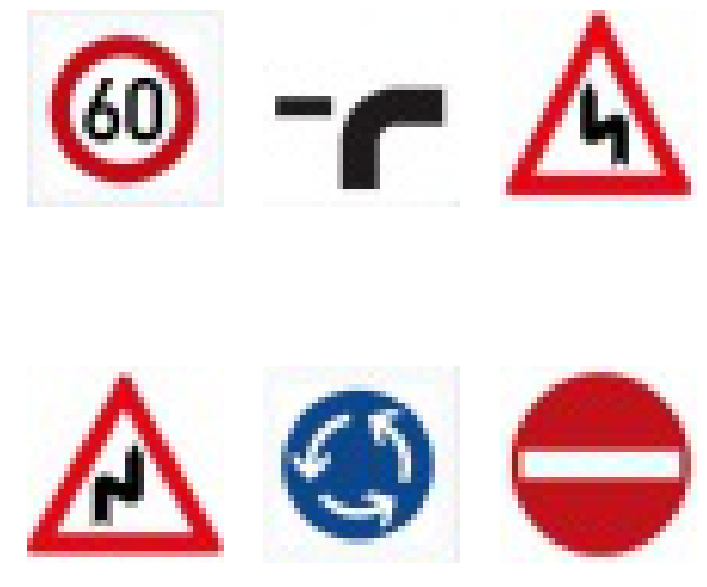

In [14]:
import os
import matplotlib.image as mpimg
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# initialize variables
my_pics_directory = ""
my_pics_show = ""
my_pics_data = []
my_pics_array = []

# display images
figure, axis = plt.subplots(2,3, figsize=(12, 12))
axis = axis.ravel()

for i in range(0, 6):
    my_pics_show = my_pics_directory + "test" + str(i+1) + ".jpg"
    my_jpg = Image.open(my_pics_show)
    my_image = mpimg.imread(my_pics_show)
    my_pics_data.append(my_image)

    my_pics_array = np.array(my_pics_data[i-1])
    axis[i].axis('off')
    axis[i].imshow(my_image)

my_labels = np.array([3, 33, 21, 21, 40, 17]) 
my_pics_data = np.array(my_pics_data)


## Process Images and Measure Performance

In [15]:
# Convert image to grayscale
print("Additional pictures shape =", my_pics_data[0].shape)

my_pics_data = toGrayscale(my_pics_data)

# Normalize
my_pics_data = normalize(my_pics_data)  

print("Processed additional pictures shape =", my_pics_data[0].shape)


Additional pictures shape = (32, 32, 3)
Processed additional pictures shape = (32, 32, 1)


In [16]:
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(my_pics_data, my_labels)

    print("My Data Set Accuracy = {:.3f}".format(my_accuracy))

My Data Set Accuracy = 0.667


## Top 5 Softmax Probabilities

In [17]:
k_size = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_pics_data, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_pics_data, keep_prob: 1.0})
    
for i in range(6):
    print('Probabilities for Image', i+1, ':', my_top_k[0][i]) 
    print('Predicted Classes for Image', i+1, ':', my_top_k[1][i], '\n') 
    

Probabilities for Image 1 : [  1.00000000e+00   6.88732582e-09   1.61731183e-13   1.08700215e-15
   5.91554903e-22]
Predicted Classes for Image 1 : [ 3  5  1  2 10] 

Probabilities for Image 2 : [  1.00000000e+00   2.43907845e-12   5.32605814e-22   2.47369220e-23
   1.55875045e-25]
Predicted Classes for Image 2 : [11 12 40 30 28] 

Probabilities for Image 3 : [  9.99999762e-01   2.73506970e-07   7.85318061e-11   3.01418820e-11
   4.60395339e-13]
Predicted Classes for Image 3 : [21 11  2 31 30] 

Probabilities for Image 4 : [  1.00000000e+00   2.17744400e-09   7.29047378e-11   3.72098619e-13
   4.75235162e-15]
Predicted Classes for Image 4 : [11 32  6 41 28] 

Probabilities for Image 5 : [  1.00000000e+00   3.87478982e-09   2.03456255e-16   1.31969467e-16
   9.96429973e-20]
Predicted Classes for Image 5 : [40  7 11 27 42] 

Probabilities for Image 6 : [  1.00000000e+00   1.76374106e-13   1.00997421e-17   2.50664139e-18
   1.82106376e-18]
Predicted Classes for Image 6 : [17 14 26 30  0] 